In [1]:
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import numpy as np
from typing import Dict, List, Optional
import random

In [20]:
def get_potential_function_1(norm_q_ij, r_max):
    return r_max/(norm_q_ij*(1 - norm_q_ij/r_max))

def get_potential_function_2(norm_q_ij, r_max):
    return 1/norm_q_ij**2 + 1/(r_max**2 - norm_q_ij**2)

In [21]:
def plot_potential_fcn(r_max, step: Optional[int] = 100, savefig: Optional[bool] = False):
    z_range = np.arange(start=0, stop=r_max, step=step)
    psi = [get_potential_function_2(norm_q_ij=z, r_max=r_max) for z in z_range]
    fig, ax = plt.subplots(1, 1)
    ax.plot(z_range, psi)
    ax.set_ylabel(r"$\psi$")
    # ax.set_xticks([0, r_max/2,r_max])
    # ax.set_xticklabels([r"$0$", r"$\frac{r_{max}}{2}$", r"$r_{max}$"])
    ax.grid(axis="both", linestyle="--")
    plt.plot()
    # if savefig:
    #     plt.savefig("plot_gradient_and_potential.png")

/tmp/ipykernel_456/4273020188.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  return r_max/(norm_q_ij*(1 - norm_q_ij/r_max))


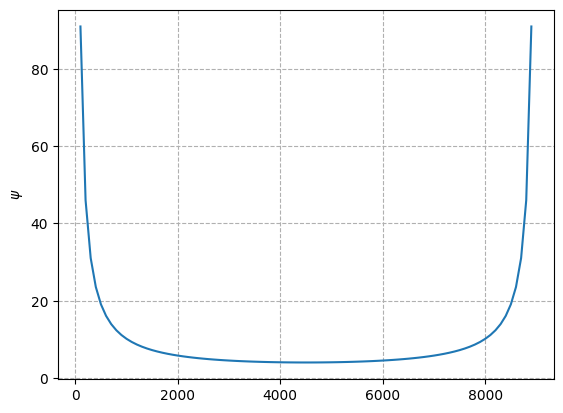

In [12]:
plot_potential_fcn(9000)

/tmp/ipykernel_456/1323466432.py:5: RuntimeWarning: divide by zero encountered in long_scalars
  return 1/norm_q_ij**2 + 1/(r_max**2 - norm_q_ij**2)


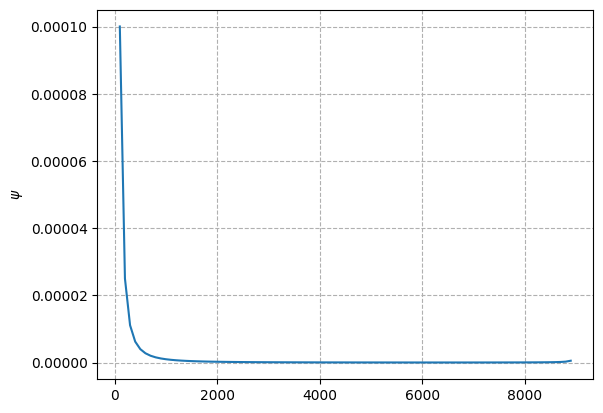

In [22]:
plot_potential_fcn(9000)

In [5]:
def ideal_pot_func(norm_q_ij, r_max, d):
    norm_q_ij = norm_q_ij/d
    r_max = r_max/d
    if norm_q_ij <= r_max:
        return r_max/(norm_q_ij*(r_max-norm_q_ij))
        #return r_max/(norm_q_ij*(1 - norm_q_ij/r_max))
    else:
        #return norm_q_ij/(r_max*(norm_q_ij/r_max-1))
        #return (norm_q_ij/r_max -1)**2
        #return (norm_q_ij -r_max)**2
        return np.log(norm_q_ij-r_max+1)

In [6]:
def plot_potential_fcn_ideal(r_max_pot, r_max_plot, d, step: Optional[int] = 10, savefig: Optional[bool] = False):
    z_range = np.arange(start=0, stop=r_max_plot, step=step)
    psi = [ideal_pot_func(norm_q_ij=z, r_max=r_max_pot, d=d) for z in z_range]
    fig, ax = plt.subplots(1, 1)
    ax.plot(z_range, psi)
    ax.set_ylabel(r"$\psi$")
    # ax.set_xticks([0, r_max/2,r_max])
    # ax.set_xticklabels([r"$0$", r"$\frac{r_{max}}{2}$", r"$r_{max}$"])
    ax.grid(axis="both", linestyle="--")
    plt.plot()
    # if savefig:
    #     plt.savefig("plot_gradient_and_potential.png")

/tmp/ipykernel_473/745557423.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  return r_max/(norm_q_ij*(r_max-norm_q_ij))


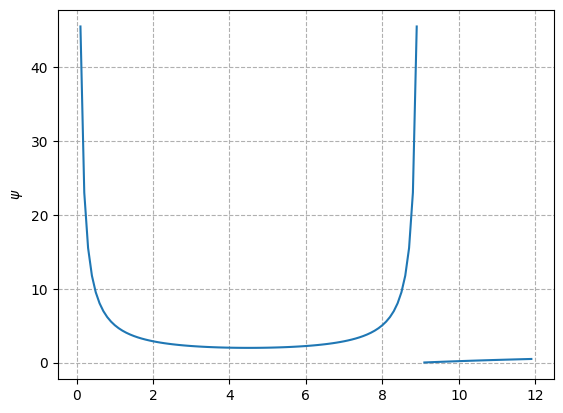

In [10]:
plot_potential_fcn_ideal(9, 12, 4.5, step=0.1)

Final implementation_

In [21]:
def pot_func(q_ij, r_max):
    norm_q_ij = np.linalg.norm(q_ij,2)
    if norm_q_ij <= r_max:
        return r_max/(norm_q_ij*(r_max-norm_q_ij))
        # return r_max/(norm_q_ij*(1 - norm_q_ij/r_max))
    else:
        #return norm_q_ij/(r_max*(norm_q_ij/r_max-1))
        #return (norm_q_ij/r_max -1)**2
        #return (norm_q_ij -r_max)**2
        return np.log(norm_q_ij-r_max+1)

In [22]:
def gradient(q_ij, r_max):
    norm_q_ij = np.linalg.norm(q_ij,2)
    # if norm_q_ij <= r_max:
    #     scaling_fact = -r_max*(r_max-2*norm_q_ij)/(norm_q_ij**3*(r_max-norm_q_ij)**2)
    #     return scaling_fact*q_ij
    # else:
    #     scaling_fact = (2*norm_q_ij - 2*r_max)/norm_q_ij
    #     return scaling_fact*q_ij
    if norm_q_ij <= r_max:
        return -r_max*(r_max-2*norm_q_ij)/(norm_q_ij**2*(r_max-norm_q_ij)**2)
    else:
        #return -2*(r_max- norm_q_ij)
        return 1/(norm_q_ij-r_max+1)

In [23]:
def plot_pot_and_grad(x_ij_list, y_ij_list, r_max):
    q_ij_list = [np.array([x_ij,y_ij]) for x_ij, y_ij in zip(x_ij_list,y_ij_list)]
    psi = [pot_func(q_ij, r_max) for q_ij in q_ij_list]
    phi = [gradient(q_ij, r_max) for q_ij in q_ij_list]
    fig, (ax1, ax2) = plt.subplots(2, 1)
    z_range = [np.linalg.norm(q_ij) for q_ij in q_ij_list]
    z_plot, phi_plot = zip(*sorted(zip(z_range, phi)))
    ax1.plot(z_plot, phi_plot)
    ax1.set_ylabel(r"$\phi_{\alpha}$")
    ax1.grid(axis="both", linestyle="--")
    z_plot, psi_plot = zip(*sorted(zip(z_range, psi)))
    ax2.plot(z_plot,psi_plot)
    ax2.set_ylabel(r"$\psi_{\alpha}$")
    ax2.grid(axis="both", linestyle="--")
    plt.plot()

/tmp/ipykernel_473/4195365486.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  return r_max/(norm_q_ij*(r_max-norm_q_ij))
/tmp/ipykernel_473/2105761412.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  return -r_max*(r_max-2*norm_q_ij)/(norm_q_ij**2*(r_max-norm_q_ij)**2)


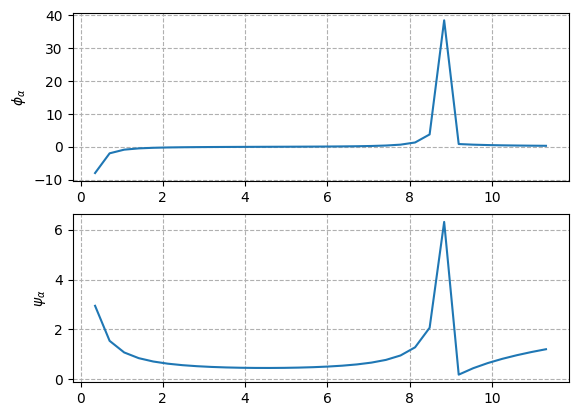

In [30]:
lim = 8
x_ij = np.arange(-lim,lim,0.25)
y_ij = np.arange(-lim, lim,0.25)
# random.shuffle(x_ij)
# random.shuffle(y_ij)
plot_pot_and_grad(x_ij_list=list(x_ij), y_ij_list=list(y_ij), r_max=9)

Try with a sigma norm:

In [19]:
def sigma_norm(z_norm):
    epsilon = 0.5
    val = epsilon * (z_norm**2)
    return 1 / epsilon * (np.sqrt(1 + val) - 1)

def pot_func_1(q_ij, r_max):
    norm_q_ij = sigma_norm(np.linalg.norm(q_ij,2))
    r_max = sigma_norm(r_max)
    if norm_q_ij <= r_max:
        return r_max/(norm_q_ij*(r_max-norm_q_ij))
    else:
        return np.log(norm_q_ij-r_max+1)

def gradient_1(q_ij, r_max, grad_clip):
    norm_q_ij = sigma_norm(np.linalg.norm(q_ij,2))
    r_max = sigma_norm(r_max)
    if norm_q_ij <= r_max:
        grad = -r_max*(r_max-2*norm_q_ij)/(norm_q_ij**2*(r_max-norm_q_ij)**2) 
    else:
        grad = 1/(norm_q_ij-r_max+1)
    if -grad_clip< grad < grad_clip:
        return grad
    elif grad > grad_clip:
        return grad_clip
    else:
        return -grad_clip

def plot_pot_and_grad_1(x_ij_list, y_ij_list, r_max, grad_clipping):
    q_ij_list = [np.array([x_ij,y_ij]) for x_ij, y_ij in zip(x_ij_list,y_ij_list)]
    psi = [pot_func_1(q_ij, r_max) for q_ij in q_ij_list]
    phi = [gradient_1(q_ij, r_max, grad_clipping) for q_ij in q_ij_list]
    fig, (ax1, ax2) = plt.subplots(2, 1)
    z_range = [np.linalg.norm(q_ij) for q_ij in q_ij_list]
    z_plot, phi_plot = zip(*sorted(zip(z_range, phi)))
    ax1.plot(z_plot, phi_plot)
    ax1.set_ylabel(r"$\phi_{\alpha}$")
    ax1.grid(axis="both", linestyle="--")
    z_plot, psi_plot = zip(*sorted(zip(z_range, psi)))
    ax2.plot(z_plot,psi_plot)
    ax2.set_ylabel(r"$\psi_{\alpha}$")
    ax2.grid(axis="both", linestyle="--")
    plt.plot()

/tmp/ipykernel_473/1229450116.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  return r_max/(norm_q_ij*(r_max-norm_q_ij))
/tmp/ipykernel_473/1229450116.py:18: RuntimeWarning: divide by zero encountered in double_scalars
  grad = -r_max*(r_max-2*norm_q_ij)/(norm_q_ij**2*(r_max-norm_q_ij)**2)


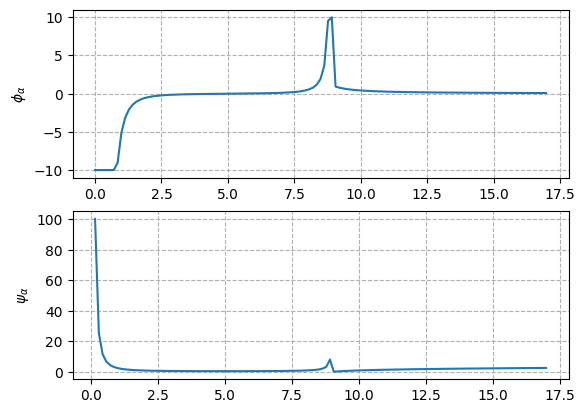

In [20]:
lim = 12
x_ij = np.arange(-lim,lim,0.1)
y_ij = np.arange(-lim, lim,0.1)
# random.shuffle(x_ij)
# random.shuffle(y_ij)
plot_pot_and_grad_1(x_ij_list=list(x_ij), y_ij_list=list(y_ij), r_max=9, grad_clipping=10)

/tmp/ipykernel_456/1388351323.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  return r_max/(norm_q_ij*(r_max-norm_q_ij))
/tmp/ipykernel_456/1388351323.py:18: RuntimeWarning: divide by zero encountered in double_scalars
  grad = -r_max*(r_max-2*norm_q_ij)/(norm_q_ij**2*(r_max-norm_q_ij)**2)


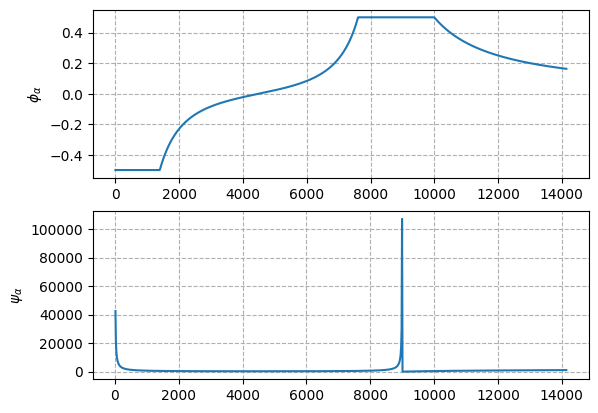

In [250]:
plot_pot_and_grad_1(x_ij_list=list(x_ij), y_ij_list=list(y_ij), r_max=9000, grad_clipping=0.5)